## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-004A-Clustering-K-Means-China

In [1]:
!pip install Pillow

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import os
import PIL

In [3]:
n_colors = 64

# Load the Summer Palace photo

In [4]:
china0 = load_sample_image("china.jpg")
print(china0.size)

819840


Convert to floats instead of the default 8 bits integer coding. Dividing by
255 is important so that plt.imshow behaves works well on float data (need to
be in the range [0-1])

In [5]:
china1 = np.array(china0, dtype=np.float64) / 255
print(china1.shape)

(427, 640, 3)


# Load Image and transform to a 2D numpy array.

In [6]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china1.shape)
assert d == 3
image_array = np.reshape(china1, (w * h, d))

In [7]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.972s.


# Get labels for all points

In [8]:
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (k-means)
done in 0.679s.


In [9]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
done in 0.560s.


In [10]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image

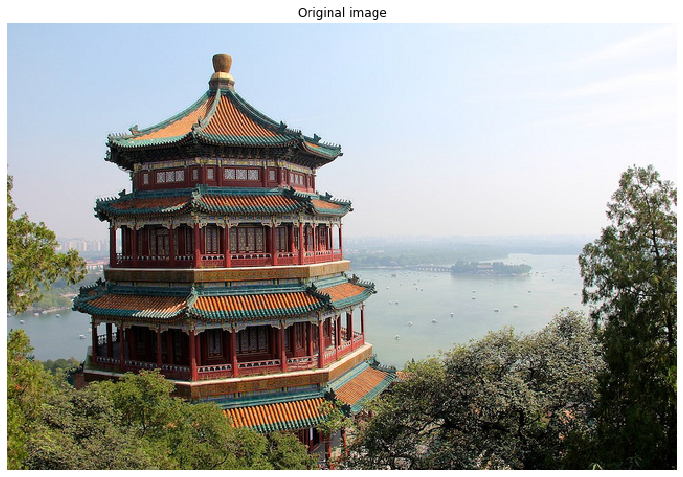

In [11]:
fig1 = plt.figure(1, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(china1)
plt.show()

In [12]:
imagename1 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-004A-Clustering-K-Means-China-01.jpg'])
fig1.savefig(imagename1, bbox_inches='tight')

In [13]:
china2=recreate_image(kmeans.cluster_centers_, labels, w, h)
print(china2.shape)

(427, 640, 3)


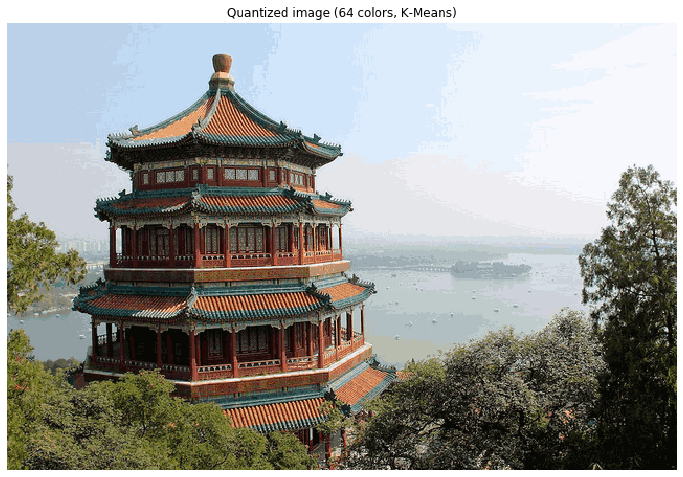

In [14]:
fig2 = plt.figure(2, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

In [15]:
imagename2 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-004A-Clustering-K-Means-China-02.jpg'])
fig2.savefig(imagename2, bbox_inches='tight')

In [16]:
china3=recreate_image(codebook_random, labels_random, w, h)
print(china3.shape)

(427, 640, 3)


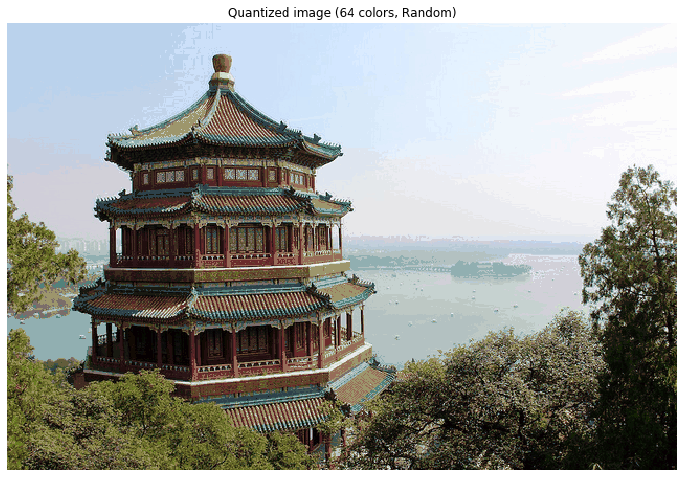

In [17]:
fig3 = plt.figure(3, figsize=(12, 9))
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(china3)
plt.show()

In [18]:
imagename3 = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-004A-Clustering-K-Means-China-03.jpg'])
fig3.savefig(imagename3, bbox_inches='tight')

## Done

In [19]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-08-03 16:33:23.657388
